<strong>Domain</strong>: Manufacturing<br/>
<strong>Objective(s)</strong>: 
<ul><li>Tackle curse of dimentionality</li>
    <li>Predict time it takes to pass testing</li></ul>
<strong>Dataset</strong>: Mercedes Benz greener manufacturing data provided in train.csv for training model and test.csv & sample_submission.csv for predicting and validation.<br/>
<strong>Attributes</strong>: This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.
The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.<br/>


### Let's start with importing train.csv and analyze it

In [3]:
#import libraries
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
path = "C:/Users/aarti_/machine_learning/projects/mercedes-benz-greener-manufacturing/"
df=pd.read_csv(path + 'train.csv')
df.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...   X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...      0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...      1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...      0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...      0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...      0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [5]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
df.shape
df.size
cols = list(df)
df.columns

(4209, 378)

1591002

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [7]:
# Do dummy coding
for col in df.columns:
    if df[col].dtype =='object':
        df[col]=pd.Categorical(df[col]).codes

df.head(5)

ID       y  X0  X1  X2  X3  X4  X5  X6  X8  ...   X375  X376  X377  X378  \
0   0  130.81  32  23  17   0   3  24   9  14  ...      0     0     1     0   
1   6   88.53  32  21  19   4   3  28  11  14  ...      1     0     0     0   
2   7   76.26  20  24  34   2   3  27   9  23  ...      0     0     0     0   
3   9   80.62  20  21  34   5   3  27  11   4  ...      0     0     0     0   
4  13   78.02  20  23  34   5   3  12   3  13  ...      0     0     0     0   

   X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     1     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 378 columns]

In [8]:
#There are columns that have same value for all rows, we can just drop them
columns_to_drop = [];
cols = list(df)
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df.drop(cols_to_drop, axis=1, inplace=True)
df.shape

(4209, 366)

In [9]:
#We can get rid of ID from our dataframe as it is of no significance in analysis
df.drop('ID', axis=1, inplace=True)

In [10]:
#now is the time to define features and labels
X=df.drop("y", axis=1)
X.head(5)

y=df["y"]
X.describe()

X0  X1  X2  X3  X4  X5  X6  X8  X10  X12  ...   X375  X376  X377  X378  \
0  32  23  17   0   3  24   9  14    0    0  ...      0     0     1     0   
1  32  21  19   4   3  28  11  14    0    0  ...      1     0     0     0   
2  20  24  34   2   3  27   9  23    0    0  ...      0     0     0     0   
3  20  21  34   5   3  27  11   4    0    0  ...      0     0     0     0   
4  20  23  34   5   3  12   3  13    0    0  ...      0     0     0     0   

   X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     1     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 364 columns]

X0           X1           X2           X3           X4  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean     29.760751    11.113566    17.306486     2.919696     2.997862   
std      13.738338     8.531001    10.899914     1.739912     0.073900   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      19.000000     3.000000     8.000000     2.000000     3.000000   
50%      35.000000    13.000000    16.000000     2.000000     3.000000   
75%      43.000000    20.000000    25.000000     5.000000     3.000000   
max      46.000000    26.000000    43.000000     6.000000     3.000000   

                X5           X6           X8          X10          X12  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean     13.340223     6.807318    11.611309     0.013305     0.075077   
std       8.250832     2.916973     7.037888     0.114590     0.263547   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     6.000000     5.000000     0.000000     0.000000   
50%      15.000000     7.000000    11.000000     0.000000     0.000000   
75%      21.000000     9.000000    18.000000     0.000000     0.000000   
max      28.000000    11.000000    24.000000     1.000000     1.000000   

          ...              X375         X376         X377         X378  \
count     ...       4209.000000  4209.000000  4209.000000  4209.000000   
mean      ...          0.318841     0.057258     0.314802     0.020670   
std       ...          0.466082     0.232363     0.464492     0.142294   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.000000     0.000000     0.000000     0.000000   
50%       ...          0.000000     0.000000     0.000000     0.000000   
75%       ...          1.000000     0.000000     1.000000     0.000000   
max       ...          1.000000     1.000000     1.000000     1.000000   

              X379         X380         X382         X383         X384  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.009503     0.008078     0.007603     0.001663     0.000475   
std       0.097033     0.089524     0.086872     0.040752     0.021796   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X385  
count  4209.000000  
mean      0.001426  
std       0.037734  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 364 columns]

In [11]:
#Now, we gonna check the correlation between features
corr_matrix=X.corr();
corr_matrix

X0        X1        X2        X3        X4        X5        X6  \
X0    1.000000 -0.271123 -0.139904 -0.070645  0.017988  0.012293  0.037549   
X1   -0.271123  1.000000  0.088266  0.205657 -0.020724  0.046417 -0.079119   
X2   -0.139904  0.088266  1.000000 -0.093546  0.002289 -0.017722  0.065778   
X3   -0.070645  0.205657 -0.093546  1.000000  0.015298 -0.008161 -0.048468   
X4    0.017988 -0.020724  0.002289  0.015298  1.000000  0.039778  0.027854   
X5    0.012293  0.046417 -0.017722 -0.008161  0.039778  1.000000 -0.019917   
X6    0.037549 -0.079119  0.065778 -0.048468  0.027854 -0.019917  1.000000   
X8    0.047735 -0.000306 -0.069932 -0.001249 -0.008909  0.012746  0.018565   
X10   0.081122 -0.137193  0.042398  0.019663  0.003360 -0.006800  0.092986   
X12  -0.134577  0.112263  0.131464  0.056166  0.008245  0.060161 -0.099264   
X13  -0.130529  0.286683  0.222132 -0.216464  0.007179 -0.003452 -0.041825   
X14  -0.138310  0.079784 -0.079183  0.045183  0.005544 -0.003439  0.028516   
X15   0.011491 -0.023295 -0.001613 -0.024059  0.000631 -0.003542 -0.002297   
X16   0.003940 -0.005591 -0.020227 -0.008337 -0.061497 -0.032571  0.035292   
X17  -0.060401  0.120044  0.024392 -0.046271  0.002533 -0.031128  0.054548   
X18  -0.036495  0.068924 -0.060337 -0.028413  0.002572 -0.004646 -0.019988   
X19   0.203244 -0.207605 -0.312393 -0.068126  0.009622  0.009854  0.048629   
X20   0.030838  0.030153 -0.494692  0.073098 -0.015761  0.008522 -0.122983   
X21  -0.025532  0.069149 -0.018519 -0.032411  0.001481 -0.029751  0.003382   
X22   0.147904 -0.129648  0.444380 -0.188833  0.008931 -0.050032  0.035421   
X23   0.115098 -0.011723  0.115886  0.055659  0.004204 -0.033924  0.026774   
X24   0.001554 -0.022323 -0.008234 -0.048153  0.001263  0.008780 -0.000858   
X26  -0.006131 -0.004501  0.030495 -0.041311  0.002049 -0.024992  0.026645   
X27   0.050622 -0.048785  0.137151 -0.049081  0.021713  0.037836 -0.062026   
X28  -0.100412  0.127520  0.280952  0.162385  0.005308  0.026029 -0.003490   
X29  -0.149090  0.202989  0.209387  0.188854  0.006134  0.006306  0.013201   
X30   0.062321  0.035667 -0.076038  0.078486  0.001949  0.010111  0.006879   
X31   0.120973 -0.092994  0.110163 -0.080666  0.000695 -0.040828  0.019952   
X32   0.094024 -0.004861 -0.168747 -0.082171  0.003075  0.025765  0.058184   
X33   0.012613  0.021482 -0.001848 -0.008149  0.000446  0.018050  0.022160   
...        ...       ...       ...       ...       ...       ...       ...   
X355  0.132281 -0.332577 -0.065141 -0.189158 -0.010442  0.022560  0.026425   
X356  0.159288 -0.407207  0.017311 -0.392994  0.013551 -0.002591 -0.003423   
X357  0.015664  0.048057 -0.004134  0.041239  0.000998 -0.023996  0.007008   
X358 -0.331767  0.492712 -0.020174  0.196666 -0.014025 -0.018653 -0.129731   
X359 -0.024918  0.124822 -0.015778  0.037152  0.005248 -0.022078 -0.004724   
X360 -0.212191  0.240327  0.185954 -0.117218 -0.015865  0.037645 -0.078442   
X361 -0.021215  0.244337  0.095281 -0.209929 -0.005427 -0.028669 -0.030375   
X362  0.417100 -0.553714 -0.121228 -0.208063  0.010831  0.035216  0.104187   
X363 -0.235644  0.209735 -0.086462  0.031959 -0.009071  0.028312 -0.096939   
X364 -0.040265  0.026452  0.018530  0.048572  0.001547 -0.002205  0.027977   
X365 -0.040265  0.026452  0.018530  0.048572  0.001547 -0.002205  0.027977   
X366  0.010643 -0.003694 -0.005400  0.017451  0.000998 -0.000586  0.040116   
X367 -0.054229 -0.045593 -0.044346 -0.203050 -0.007746  0.040783  0.205846   
X368 -0.081594 -0.052381  0.084253 -0.155343 -0.019036 -0.000097  0.003987   
X369  0.001967 -0.020739  0.019393  0.001006  0.000631 -0.003542  0.012654   
X370  0.050787  0.097932  0.170400 -0.009662  0.002368  0.007608  0.029456   
X371 -0.085449  0.079697  0.175921  0.143799  0.003480 -0.003016  0.015503   
X372 -0.015493  0.029105  0.033397  0.026072  0.000631  0.005708  0.020130   
X373  0.021198 -0.123914 -0.102637  0.161539  0.004054 -0.007035 -0.040552   
X374 -0.161102  0.202307 -0.036632

Text(0.5,1,'Correlation between different features')

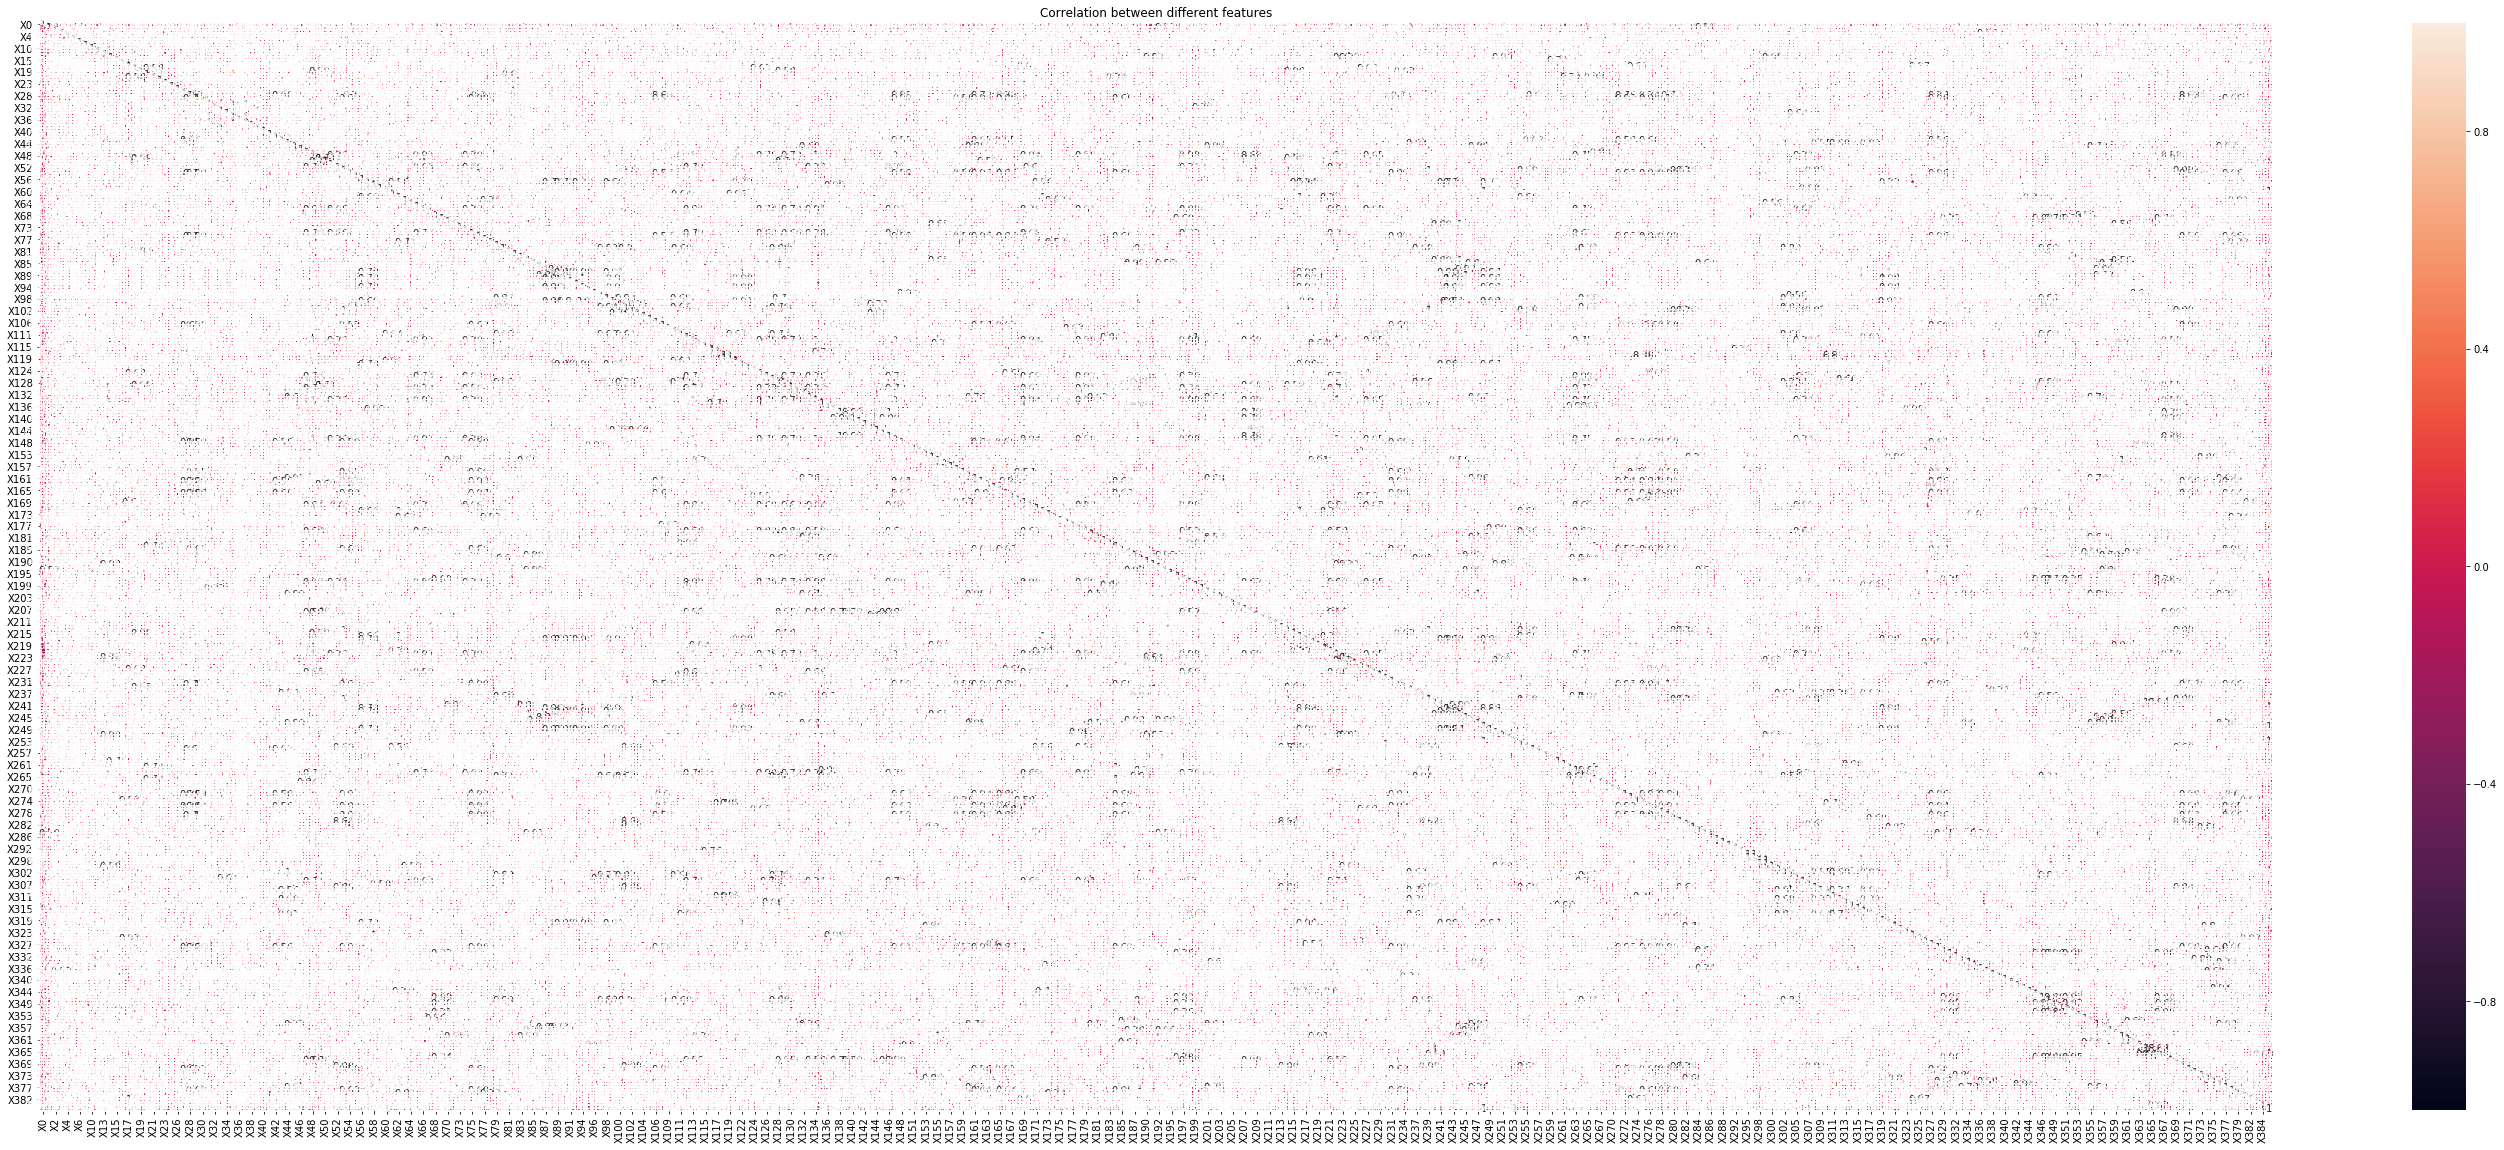

In [10]:
plt.figure(figsize=(50,20))
ax = sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation between different features")
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std = scaler.fit_transform(X)

Text(0.5,0,'Number of components')

Text(0,0.5,'Cumulative explained variance')

Text(100,0.9,'100')

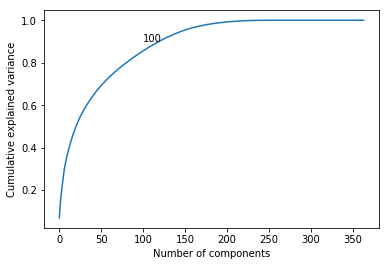

In [13]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('100',xy=(100, .90))

In [14]:
pca.explained_variance_

array([2.50952771e+01, 2.07107407e+01, 1.65202683e+01, 1.24764119e+01,
       1.18849076e+01, 1.15148206e+01, 1.04220650e+01, 7.73229155e+00,
       7.17400910e+00, 6.49237412e+00, 5.97126062e+00, 5.69535497e+00,
       5.32564711e+00, 5.27319190e+00, 4.90892659e+00, 4.71550910e+00,
       4.52862510e+00, 4.27111088e+00, 4.08159357e+00, 3.92222353e+00,
       3.61360549e+00, 3.52963352e+00, 3.43159930e+00, 3.31270648e+00,
       3.18293125e+00, 3.06950218e+00, 2.87702953e+00, 2.77877231e+00,
       2.67072696e+00, 2.60287469e+00, 2.52296388e+00, 2.46369070e+00,
       2.37578981e+00, 2.33559339e+00, 2.26713766e+00, 2.18159231e+00,
       2.14114242e+00, 2.09238169e+00, 2.05236558e+00, 2.01488971e+00,
       2.00481010e+00, 1.96636784e+00, 1.94389643e+00, 1.91004001e+00,
       1.85754839e+00, 1.83220131e+00, 1.80545203e+00, 1.72100618e+00,
       1.69109161e+00, 1.66213310e+00, 1.60061336e+00, 1.57630353e+00,
       1.56674589e+00, 1.54286072e+00, 1.52993502e+00, 1.51268264e+00,
      

This cumulative explained variance graph helps us to choose the number of desired principal components 
- **90%** variation in the data is explaining by the first **100 principal components** 

<Container object of 364 artists>

Text(0,0.5,'Eigen Value')

Text(0.5,0,'Principal components')

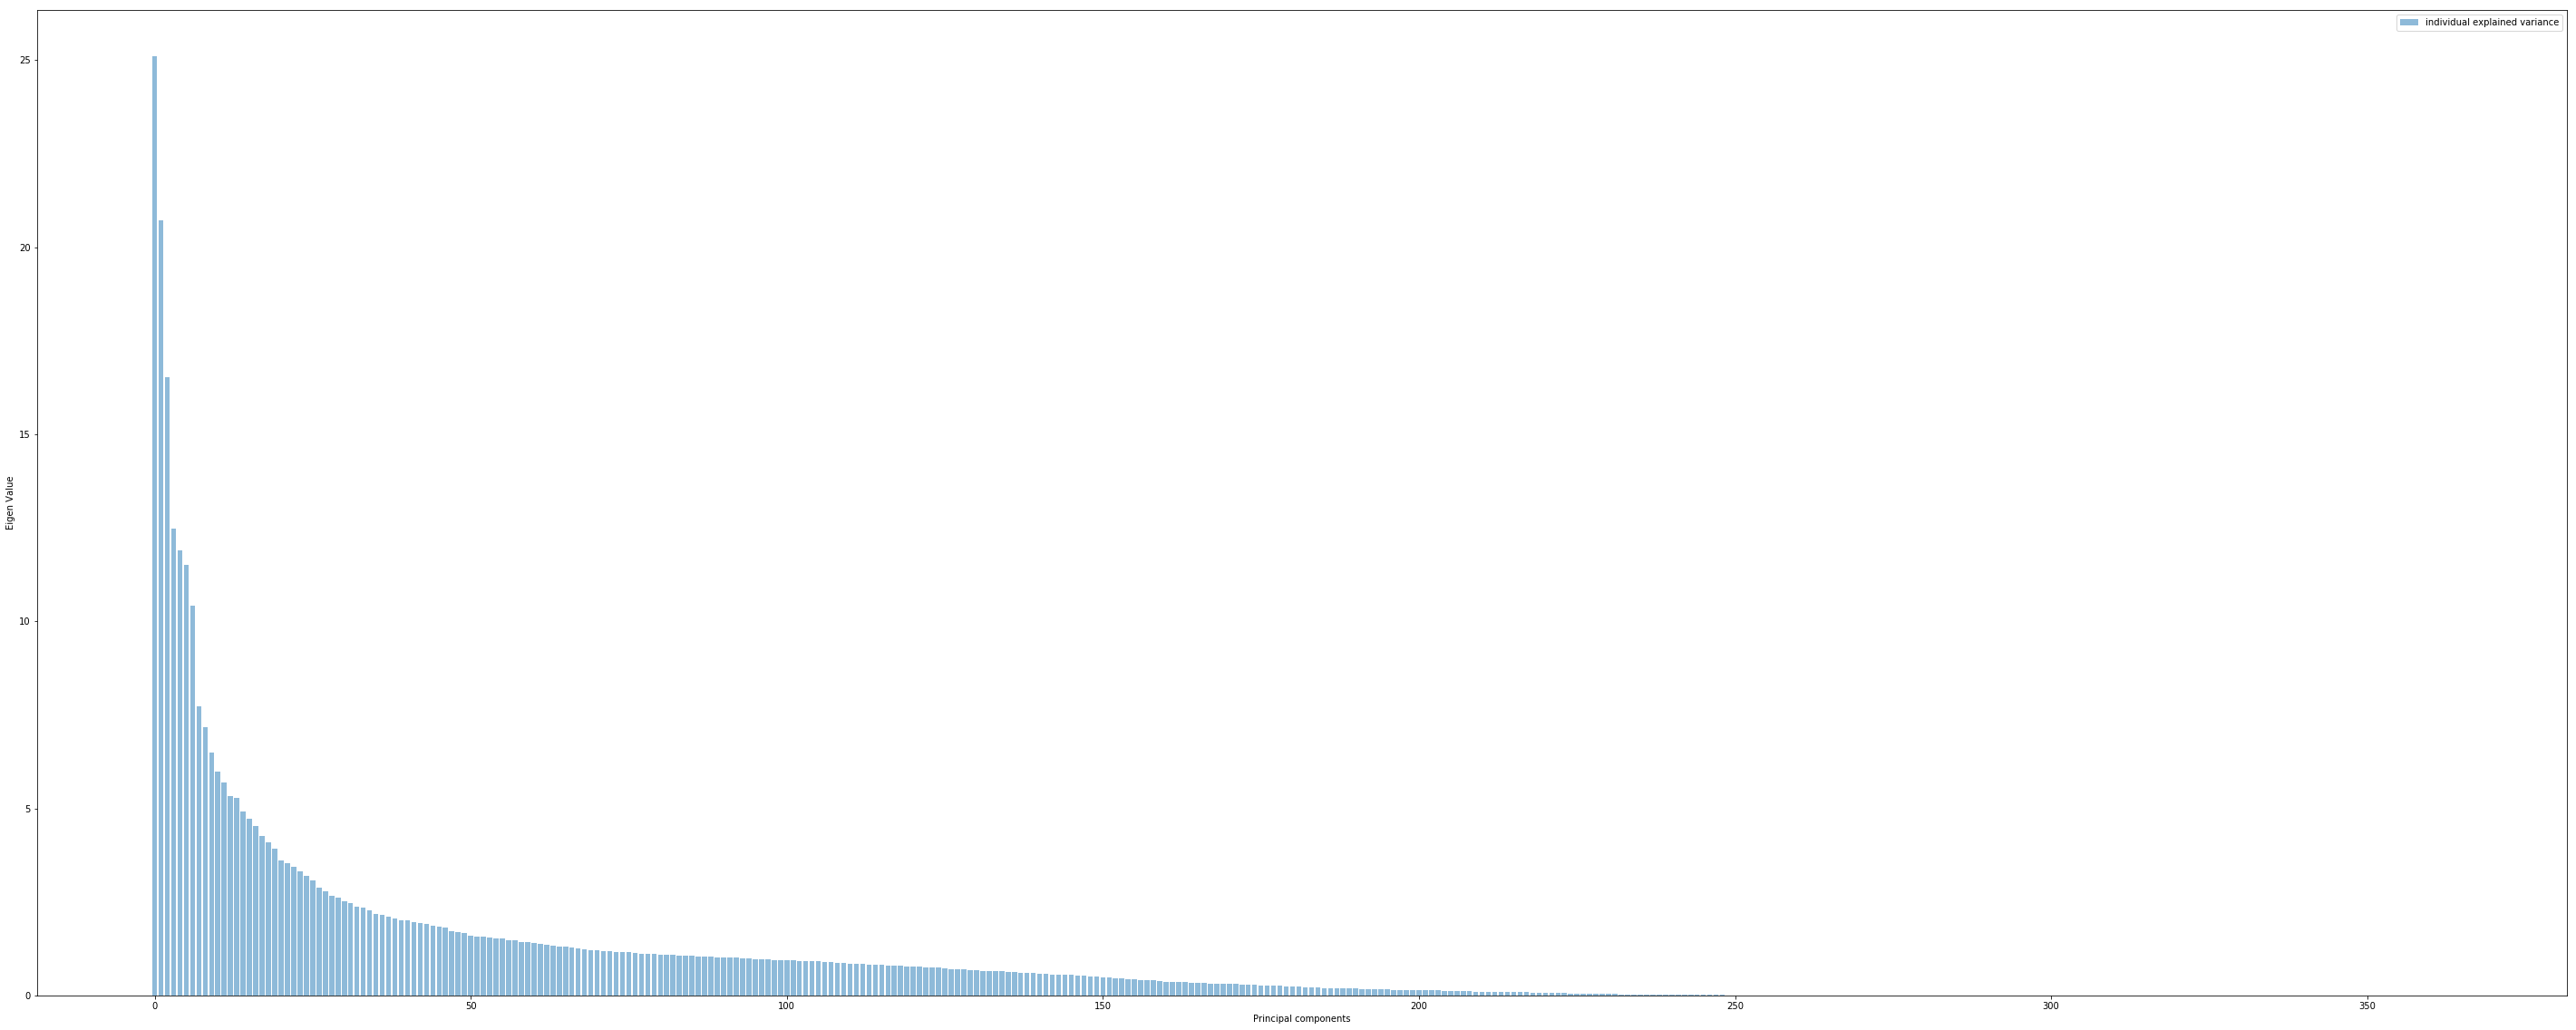

In [15]:
# individual explained variance
plt.figure(figsize=(50, 20))

plt.bar(range(364), pca.explained_variance_, alpha=0.5,
            label='individual explained variance')
plt.ylabel('Eigen Value')
plt.xlabel('Principal components')
plt.legend(loc='best')

Text(0.5,1,'Correlation between different components')

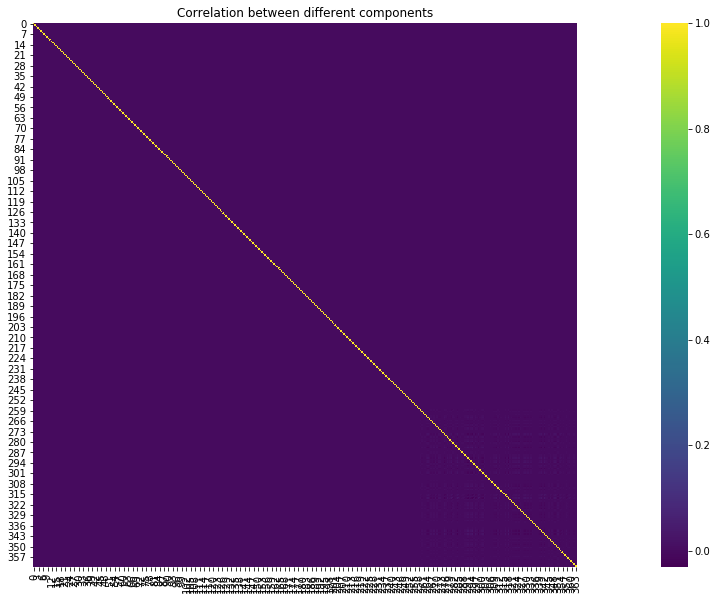

In [16]:
#PCA transforms a set of correlated variables into a set of linearly uncorrelated variables called principal components, 
#we can check the correlarion with a heat map of correlation matrix
plt.figure(figsize=(30, 10))
pca_transformed = PCA().fit_transform(X_std)
correlation = pd.DataFrame(pca_transformed).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different components')

In [17]:
#consider first 100 components as they are explaining the 90% of variation in the data
x_pca = PCA(n_components=100)
transformed_pca = x_pca.fit_transform(X_std)
pca_df = pd.DataFrame(transformed_pca)
pca_df.head(5)

0          1         2         3         4         5         6   \
0  12.254468  -2.944214 -0.957864  2.016681 -1.530610 -3.608519  9.025623   
1  -0.102547   0.366066  0.997226  1.159020 -2.586958 -0.042269  1.004638   
2  10.278316  21.104928 -5.013292 -4.470145  0.889344  2.558850  1.150616   
3   7.361872  21.368233 -5.999762  0.233292  2.000952  0.686088  0.426455   
4   6.576137  21.442037 -6.547388  0.935239  2.002014 -0.030464 -0.983438   

         7          8         9     ...           90        91        92  \
0 -3.758877 -15.990273  8.525273    ...     0.403651 -0.838471  0.412401   
1 -0.610743  -0.431043  0.192181    ...     1.864778 -0.888216  1.167074   
2  3.615093  -0.877711  1.342775    ...     0.224501  0.389026 -1.982369   
3 -0.069807   0.298811  2.937582    ...    -2.400507  0.318562 -0.554299   
4 -0.261808   1.024836  0.843168    ...    -1.249554  0.972493 -2.579090   

         93        94        95        96        97        98        99  
0 -0.036362  0.069100 -0.043890 -1.172526 -0.123769  0.234099 -0.126038  
1  1.251240 -0.665885  0.132367  2.802441  1.512285 -1.200636  0.691850  
2 -1.911998 -2.493629  0.791350 -1.132896  3.192965 -2.098750  2.916278  
3 -1.122088  0.686012 -0.377078  1.517082 -0.247347  0.776917 -0.043851  
4 -1.588360 -1.131500  0.909756 -1.625376  1.587999 -0.181913  3.123647  

[5 rows x 100 columns]

In [29]:
test_df=pd.read_csv(path + 'test.csv')
sample_df=pd.read_csv(path+'sample_submission.csv')

test_df.drop('ID', axis=1, inplace=True)
sample_df.drop('ID', axis=1, inplace=True)

test_df.head()
sample_df.head()

X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  ...   X375  X376  X377  X378  X379  \
0  az  v   n  f  d  t  a  w    0    0  ...      0     0     0     1     0   
1   t  b  ai  a  d  b  g  y    0    0  ...      0     0     1     0     0   
2  az  v  as  f  d  a  j  j    0    0  ...      0     0     0     1     0   
3  az  l   n  f  d  z  l  n    0    0  ...      0     0     0     1     0   
4   w  s  as  c  d  y  i  m    0    0  ...      1     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 376 columns]

y
0  100.669318
1  100.669318
2  100.669318
3  100.669318
4  100.669318

In [30]:
# Do dummy coding
for col in test_df.columns:
    if test_df[col].dtype =='object':
        test_df[col]=pd.Categorical(test_df[col]).codes

test_df.head(5)

scaler=StandardScaler()
X_std_test = scaler.fit_transform(test_df)

x_pca_test = PCA(n_components=100)
transformed_pca_test = x_pca.fit_transform(X_std_test)
pca_df_test = pd.DataFrame(transformed_pca_test)
pca_df_test.head(5)

X0  X1  X2  X3  X4  X5  X6  X8  X10  X11  ...   X375  X376  X377  X378  \
0  21  23  34   5   3  26   0  22    0    0  ...      0     0     0     1   
1  42   3   8   0   3   9   6  24    0    0  ...      0     0     1     0   
2  21  23  17   5   3   0   9   9    0    0  ...      0     0     0     1   
3  21  13  34   5   3  31  11  13    0    0  ...      0     0     0     1   
4  45  20  17   2   3  30   8  12    0    0  ...      1     0     0     0   

   X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     0     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 376 columns]

0          1          2         3         4         5         6   \
0  8.100588  20.964432  -8.860386  1.458085  1.954134 -0.711555 -1.397099   
1  1.073376  -4.726351 -10.076726 -1.901623  1.071545  6.536080  0.892021   
2  5.832833  18.639309  -6.447694 -1.309625  2.088789 -0.473505 -0.610511   
3  6.729667  21.257511  -8.790305  2.155765  2.026661 -1.808878 -0.877303   
4 -1.791839   1.096298   5.746787 -2.987359 -1.439671 -0.116871  0.684512   

         7         8         9     ...           90        91        92  \
0 -0.266402  1.584060 -2.447103    ...     0.059114  0.478044  0.225394   
1  5.967350  1.746848  2.854379    ...     0.029174  0.339830  0.197322   
2  4.892992  0.385087  1.322831    ...     0.266989 -0.839427 -0.717818   
3 -1.494055  1.095067 -3.192683    ...     1.907814 -4.433034 -0.848564   
4  2.206392  0.636609  0.877981    ...     0.018914 -0.403617  1.005348   

         93         94        95        96        97        98        99  
0 -0.617165   0.572451  0.543469  0.223055 -0.621758 -1.486392 -1.592409  
1  0.265819   0.309625  0.819636  0.526951 -0.434466 -0.752650 -0.074157  
2  0.335171  -0.015150 -0.666644 -0.398820  0.416573  1.109661  0.802256  
3 -3.015712  10.996827  1.765486  8.325472 -8.487061  0.161870  6.261954  
4 -0.178337  -0.299735  0.667856  0.558136  0.440793 -0.465808  0.995961  

[5 rows x 100 columns]

## Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={"C":[0.001,0.01,0.1,1,10,100,1000,10000],"penalty":('l1','l2'),"max_iter":[50,100,150,200]}

In [18]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [47]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('NB', BayesianRidge()))
models.append(('SVR', SVR()))
models

[('LR',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
 ('KNN',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform')),
 ('DT',
  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best')),
 ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
# evaluate each model in turn
results = []
names = []
mse = []
result_msg = []
color = {'LR':'b', 'KNN':'g', 'DT': 'r', 'RF': 'y', 'NB':'o', 'SVR': 'p'}
idx = 0

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=2)
    cv_results = model_selection.cross_val_score(model, pca_df, y, cv=kfold, scoring="neg_mean_squared_error")
    results.append(cv_results)
    names.append(name)
    result_msg.append("%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))
    
    model.fit(pca_df, y)
    prediction = model.predict(pca_df_test)
    grid_log=GridSearchCV(log_reg,params,cv=10)
    
    
    mse.append({name: metrics.mean_squared_error(sample_df, prediction)})
    

   
result_msg    
mse
results
names

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

-4.844482384388488e+28


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

-4.18419672952556e+28


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

-8.253063122502822e+28


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

-3.42272907279145e+28


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

-4.652107723006646e+28


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

-9.985397939475555e+27


['LR: -99.367445 (+/- 39.018420)',
 'KNN: -97.985956 (+/- 31.238636)',
 'DT: -178.483494 (+/- 43.427437)',
 'RF: -95.747985 (+/- 31.528571)',
 'NB: -82.036036 (+/- 30.181807)',
 'SVR: -97.111878 (+/- 34.379788)']

[{'LR': 88.05018836910985},
 {'KNN': 76.04926202134266},
 {'DT': 150.00235420409226},
 {'RF': 62.20931684402391},
 {'NB': 84.55371055618598},
 {'SVR': 18.148815492541544}]

[array([-183.58568656,  -63.23799498, -160.72180192,  -95.374862  ,
         -96.25489738,  -95.29596191,  -93.4619719 ,  -78.18583216,
         -64.9955836 ,  -62.55985839]),
 array([ -99.35022467,  -85.62204935, -181.48380756, -105.69487715,
         -71.59927343, -103.59918563, -109.10291106,  -80.21301835,
         -74.09761129,  -69.09659714]),
 array([-156.61273329, -161.98600521, -268.53772465, -241.66833151,
        -164.48540463, -172.90393092, -191.99719874, -136.20986959,
        -173.47234741, -116.96139578]),
 array([ -91.09252683,  -79.45205196, -179.40015688, -103.01091437,
         -62.92268829, -107.94961532, -105.20000203,  -84.91384383,
         -74.91232267,  -68.62572495]),
 array([ -86.62094512,  -62.80051585, -160.4457228 ,  -90.95037956,
         -50.75464593,  -91.05634006,  -92.3213813 ,  -69.71331715,
         -56.57446531,  -59.12264982]),
 array([ -98.92472294,  -84.2378161 , -181.50973883, -111.88712612,
         -66.76098674, -103.57225379, -118.10146755,

['LR', 'KNN', 'DT', 'RF', 'NB', 'SVR']

Text(0.5,0.98,'Algorithm Comparison')

{'boxes': [<matplotlib.lines.Line2D at 0x181d0cfd128>,
 'caps': [<matplotlib.lines.Line2D at 0x181d07fb9b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x181d5af5cc0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x181d0cfa7b8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x181d5d01860>,
  <matplotlib.lines.Line2D at 0x181d089fcf8>]}

[Text(0,0,'LR'),
 Text(0,0,'KNN'),
 Text(0,0,'DT'),
 Text(0,0,'RF'),
 Text(0,0,'NB'),
 Text(0,0,'SVR')]

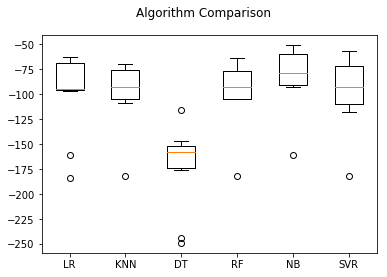

In [51]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()